Model gives 36 f1 score on the challenge

In [1]:
%reload_ext autoreload
%autoreload 2
%matplotlib inline

In [2]:
from fastai.vision import *
from fastai.metrics import error_rate
import os
import warnings

warnings.filterwarnings("ignore", category=UserWarning, module="torch.nn.functional")

In [3]:
bs = 32

In [4]:
path = "./data-split/"
train_path = os.path.join(path, 'train')
classes = os.listdir(train_path)

In [5]:
classes[:5]

['agkistrodon-contortrix',
 'agkistrodon-piscivorus',
 'coluber-constrictor',
 'crotalus-atrox',
 'crotalus-horridus']

In [6]:
test_csv = os.path.join(path, 'test.csv')       # Path to test.csv file
test_images = os.path.join(path, 'test')        # Path to test images folder

## Processing Data

In [7]:
np.random.seed(43)
data = ImageDataBunch.from_folder(path,
                                  train='train',
                                  test='test',
                                  valid_pct=0.1, 
                                  ds_tfms=get_transforms(),
                                  size=224,
                                  num_workers=4, bs=bs,
                                  no_check=True
                                 ).normalize(imagenet_stats)

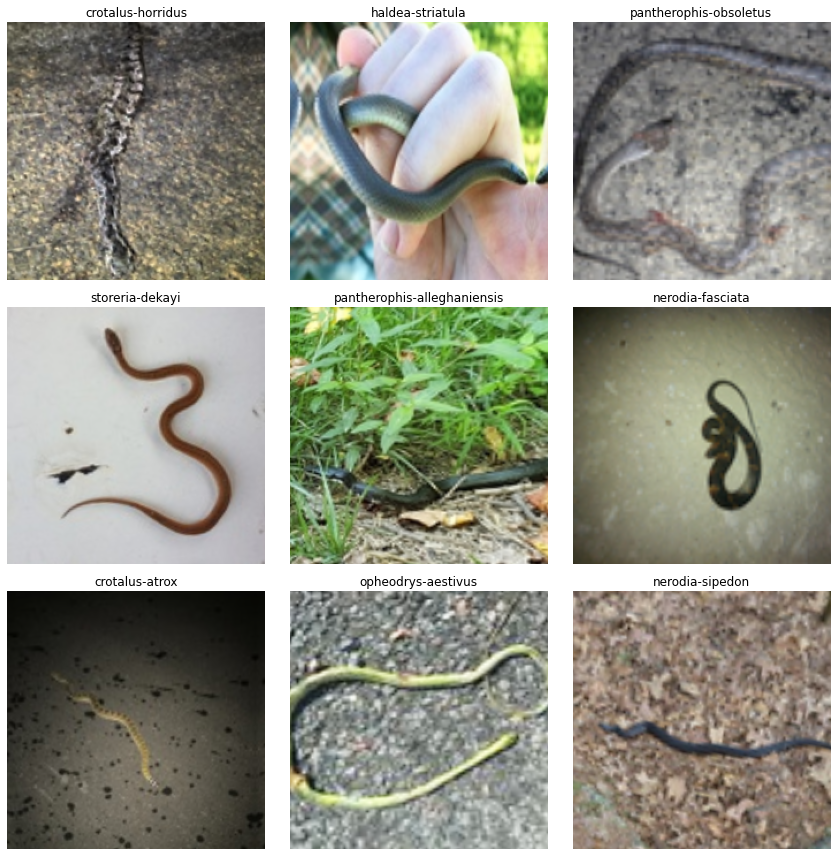

In [8]:
data.show_batch(rows=3, size=(7, 10))

In [9]:
print(data.classes)
len(data.classes),data.c


['agkistrodon-contortrix', 'agkistrodon-piscivorus', 'coluber-constrictor', 'crotalus-atrox', 'crotalus-horridus', 'crotalus-ruber', 'crotalus-scutulatus', 'crotalus-viridis', 'diadophis-punctatus', 'haldea-striatula', 'heterodon-platirhinos', 'lampropeltis-californiae', 'lampropeltis-triangulum', 'masticophis-flagellum', 'natrix-natrix', 'nerodia-erythrogaster', 'nerodia-fasciata', 'nerodia-rhombifer', 'nerodia-sipedon', 'opheodrys-aestivus', 'pantherophis-alleghaniensis', 'pantherophis-emoryi', 'pantherophis-guttatus', 'pantherophis-obsoletus', 'pantherophis-spiloides', 'pantherophis-vulpinus', 'pituophis-catenifer', 'rhinocheilus-lecontei', 'storeria-dekayi', 'storeria-occipitomaculata', 'thamnophis-elegans', 'thamnophis-marcianus', 'thamnophis-proximus', 'thamnophis-radix', 'thamnophis-sirtalis']


(35, 35)

## Training Model

In [10]:
learn = cnn_learner(data, models.resnet34, metrics=[error_rate, accuracy])

In [19]:
learn.fit_one_cycle(10)

epoch,train_loss,valid_loss,error_rate,accuracy,time
0,4.351698,3.134718,0.814545,0.185455,03:06
1,3.481005,2.765045,0.729091,0.270909,02:49
2,2.959819,2.618284,0.714545,0.285455,3:48:36
3,2.658449,2.538727,0.703636,0.296364,03:21
4,2.354322,2.449682,0.687273,0.312727,25:33
5,2.278506,2.354284,0.680000,0.320000,02:11
6,2.056813,2.322756,0.676364,0.323636,02:11
7,1.903858,2.268763,0.634545,0.365455,02:12
8,1.826207,2.259028,0.636364,0.363636,02:13
9,1.750366,2.252041,0.636364,0.363636,02:14


In [20]:
learn.save('stage-2')    # Saving the model

In [21]:
interp = ClassificationInterpretation.from_learner(learn)

losses,idxs = interp.top_losses()

len(data.valid_ds)==len(losses)==len(idxs)

True

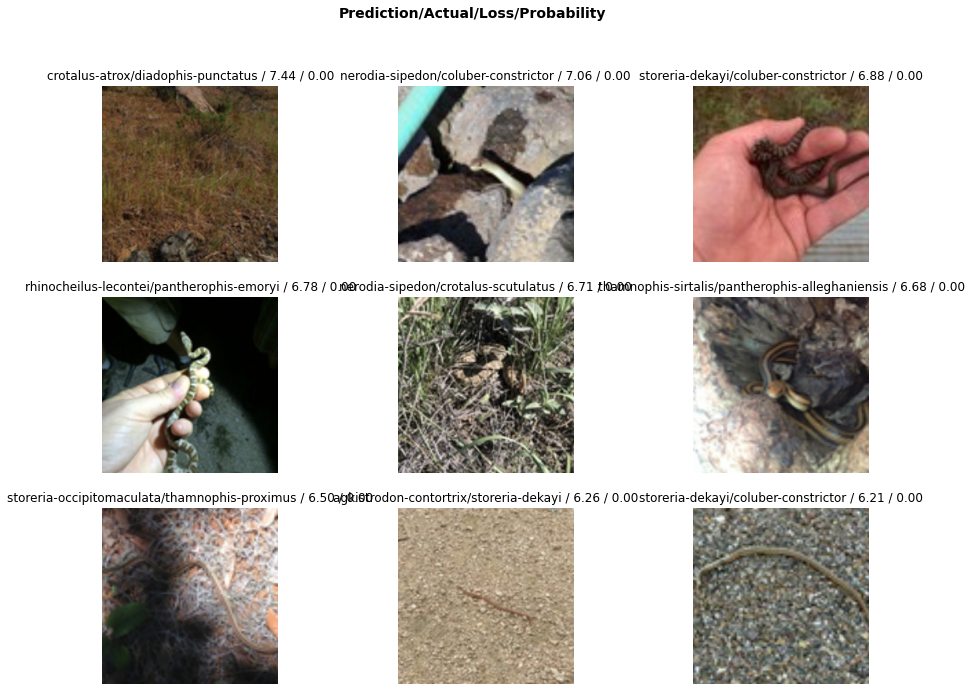

In [22]:
interp.plot_top_losses(9, figsize=(15,11))

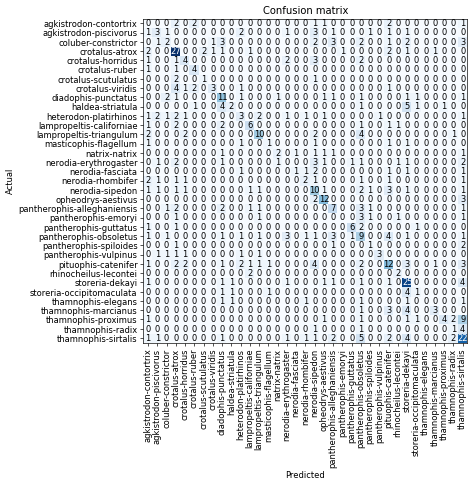

In [23]:
interp.plot_confusion_matrix(figsize=(8,8), dpi=60)

Prediction Result: crotalus-atrox


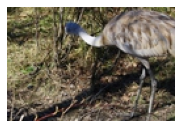

In [24]:


tst = open_image('./dataset/test/00fefc891d.jpg')

tst.show()
pred_class,pred_idx,outputs = learn.predict(tst)
print(f"Prediction Result: {pred_class.obj}")



## Making prediction on test data

In [25]:
preds, y = learn.get_preds(data.test_ds)

In [27]:
filenames = pd.read_csv(test_csv)
filenames = np.array(filenames)

In [29]:
res = []
for img in filenames:
    path = os.path.join(test_path, str(img[0]) + ".jpg")
    tst = open_image(path)
    pred_class,pred_idx,outputs = learn.predict(tst)
    pred = pred_class.obj
    res.append(pred_class.obj)

In [30]:
res[:5]

['pantherophis-alleghaniensis',
 'agkistrodon-piscivorus',
 'crotalus-atrox',
 'storeria-dekayi',
 'pituophis-catenifer']

In [32]:
df = pd.read_csv(test_csv)

In [34]:


def save_results(results):
    images = pd.read_csv(test_csv)['image_id']
    with open('fastAiRes.csv', 'w', newline='') as f:
        w = csv.writer(f)
        w.writerow(["image_id", "breed"])
        for i in range(len(images)):
            print(results[i])
            res = str(results[i])
            img = images[i]
            w.writerow([img, res])
            
save_results(res)



pantherophis-alleghaniensis
agkistrodon-piscivorus
crotalus-atrox
storeria-dekayi
pituophis-catenifer
lampropeltis-triangulum
pantherophis-obsoletus
pantherophis-obsoletus
thamnophis-sirtalis
agkistrodon-piscivorus
pantherophis-obsoletus
pituophis-catenifer
crotalus-atrox
pantherophis-obsoletus
lampropeltis-californiae
crotalus-atrox
thamnophis-proximus
pituophis-catenifer
nerodia-sipedon
agkistrodon-piscivorus
crotalus-viridis
diadophis-punctatus
crotalus-scutulatus
pantherophis-obsoletus
agkistrodon-contortrix
pituophis-catenifer
pituophis-catenifer
agkistrodon-contortrix
thamnophis-marcianus
thamnophis-radix
pantherophis-emoryi
agkistrodon-contortrix
thamnophis-sirtalis
pituophis-catenifer
thamnophis-sirtalis
storeria-dekayi
rhinocheilus-lecontei
agkistrodon-contortrix
pituophis-catenifer
crotalus-horridus
pituophis-catenifer
nerodia-rhombifer
nerodia-erythrogaster
pantherophis-obsoletus
thamnophis-sirtalis
thamnophis-sirtalis
nerodia-sipedon
crotalus-atrox
crotalus-viridis
thamnoph

pantherophis-obsoletus
thamnophis-sirtalis
storeria-dekayi
diadophis-punctatus
thamnophis-sirtalis
crotalus-ruber
pantherophis-guttatus
pituophis-catenifer
pantherophis-obsoletus
crotalus-atrox
pantherophis-guttatus
storeria-dekayi
thamnophis-sirtalis
crotalus-atrox
pantherophis-alleghaniensis
crotalus-atrox
pantherophis-obsoletus
diadophis-punctatus
thamnophis-sirtalis
agkistrodon-contortrix
pantherophis-guttatus
opheodrys-aestivus
crotalus-atrox
pituophis-catenifer
heterodon-platirhinos
pantherophis-obsoletus
lampropeltis-californiae
agkistrodon-contortrix
thamnophis-radix
opheodrys-aestivus
thamnophis-sirtalis
crotalus-atrox
agkistrodon-contortrix
pituophis-catenifer
opheodrys-aestivus
pituophis-catenifer
rhinocheilus-lecontei
nerodia-sipedon
diadophis-punctatus
crotalus-atrox
pituophis-catenifer
thamnophis-sirtalis
thamnophis-sirtalis
storeria-dekayi
pituophis-catenifer
pituophis-catenifer
crotalus-ruber
nerodia-sipedon
storeria-dekayi
thamnophis-sirtalis
storeria-dekayi
nerodia-si

thamnophis-sirtalis
crotalus-atrox
pantherophis-vulpinus
pantherophis-spiloides
nerodia-rhombifer
agkistrodon-contortrix
crotalus-atrox
thamnophis-sirtalis
thamnophis-sirtalis
nerodia-sipedon
lampropeltis-californiae
opheodrys-aestivus
nerodia-sipedon
opheodrys-aestivus
thamnophis-sirtalis
crotalus-atrox
nerodia-sipedon
lampropeltis-triangulum
pituophis-catenifer
crotalus-atrox
pituophis-catenifer
crotalus-atrox
diadophis-punctatus
nerodia-sipedon
crotalus-atrox
agkistrodon-contortrix
agkistrodon-piscivorus
nerodia-sipedon
storeria-dekayi
pituophis-catenifer
storeria-dekayi
pituophis-catenifer
nerodia-rhombifer
agkistrodon-contortrix
pituophis-catenifer
pituophis-catenifer
nerodia-erythrogaster
thamnophis-sirtalis
storeria-dekayi
nerodia-sipedon
pituophis-catenifer
nerodia-sipedon
pituophis-catenifer
pantherophis-guttatus
lampropeltis-californiae
nerodia-sipedon
thamnophis-proximus
nerodia-sipedon
storeria-dekayi
thamnophis-sirtalis
crotalus-atrox
opheodrys-aestivus
pantherophis-obsole

crotalus-ruber
nerodia-sipedon
pituophis-catenifer
storeria-dekayi
storeria-dekayi
nerodia-rhombifer
diadophis-punctatus
agkistrodon-piscivorus
nerodia-fasciata
thamnophis-sirtalis
lampropeltis-triangulum
pantherophis-emoryi
rhinocheilus-lecontei
coluber-constrictor
lampropeltis-triangulum
crotalus-ruber
rhinocheilus-lecontei
lampropeltis-californiae
thamnophis-sirtalis
crotalus-atrox
thamnophis-marcianus
pituophis-catenifer
lampropeltis-californiae
storeria-dekayi
pantherophis-obsoletus
crotalus-atrox
lampropeltis-triangulum
pantherophis-alleghaniensis
pituophis-catenifer
heterodon-platirhinos
pantherophis-obsoletus
pantherophis-alleghaniensis
pituophis-catenifer
lampropeltis-triangulum
pantherophis-obsoletus
pantherophis-guttatus
crotalus-atrox
diadophis-punctatus
storeria-dekayi
pantherophis-obsoletus
pantherophis-alleghaniensis
thamnophis-radix
diadophis-punctatus
thamnophis-sirtalis
coluber-constrictor
thamnophis-sirtalis
pituophis-catenifer
pantherophis-obsoletus
crotalus-atrox
p

## Fine tuning


In [11]:
learn.load('stage-2');

This function plots a graph of loss and learning rate.

In [12]:
learn.lr_find()

epoch,train_loss,valid_loss,error_rate,accuracy,time


LR Finder is complete, type {learner_name}.recorder.plot() to see the graph.


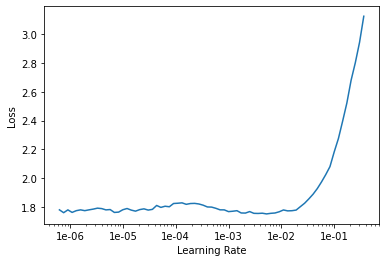

In [13]:
learn.recorder.plot()

In [14]:
learn.fit_one_cycle(2, max_lr=slice(1e-4,1e-2))

epoch,train_loss,valid_loss,error_rate,accuracy,time
0,2.699059,2.547775,0.694545,0.305455,02:09
1,2.316072,2.250085,0.643636,0.356364,02:16
